In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
purchases = pd.read_csv('amazon-purchases.csv')
surveys = pd.read_csv('survey.csv')


Clean Purchases Dataset

In [ ]:
purchases = purchases.dropna()
purchases.rename(columns={
    'ASIN/ISBN (Product Code)': 'ASIN/ISBN',
    'Shipping Address State': 'Purchase State'
}, inplace=True)

purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['Year'] = purchases['Order Date'].dt.year

if 'Quantity' in purchases.columns and 'Purchase Price Per Unit' in purchases.columns:
    purchases['Total Spending'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']

purchases

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00
5,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99
...,...,...,...,...,...,...,...,...,...,...
1850711,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75
1850712,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99
1850713,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99
1850714,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96


Customer Summary

In [ ]:
customer_summary = pd.merge(purchases, surveys, on='Survey ResponseID', how='inner')

customer_summary

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
2,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
3,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
4,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675010,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675011,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675012,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675013,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes


Customer Behavior

In [ ]:
customer_behavior = purchases.groupby('Survey ResponseID').agg({
    'Order Date': 'max',      
    'Total Spending': 'sum',        
    'ASIN/ISBN': 'count'
}).reset_index()

customer_behavior

,Survey ResponseID,Order Date,Total Spending,ASIN/ISBN
0,R_01vNIayewjIIKMF,2022-06-10,4231.86,118
1,R_037XK72IZBJyF69,2022-12-13,15894.58,1158
2,R_038ZU6kfQ5f89fH,2022-02-23,3074.47,33
3,R_03aEbghUILs9NxD,2023-01-25,3528.40,158
4,R_06RZP9pS7kONINr,2022-11-15,10424.85,411
...,...,...,...,...
4955,R_zd4E1BgAdaM2761,2022-12-27,12921.29,500
4956,R_zdLOP8JD2pe1brj,2023-02-24,6224.64,315
4957,R_zdQYFhfeqyBd2dH,2023-03-05,5914.46,244
4958,R_zfnsck2ZatnGtY5,2023-03-03,9837.88,570


Trend of customer behavior

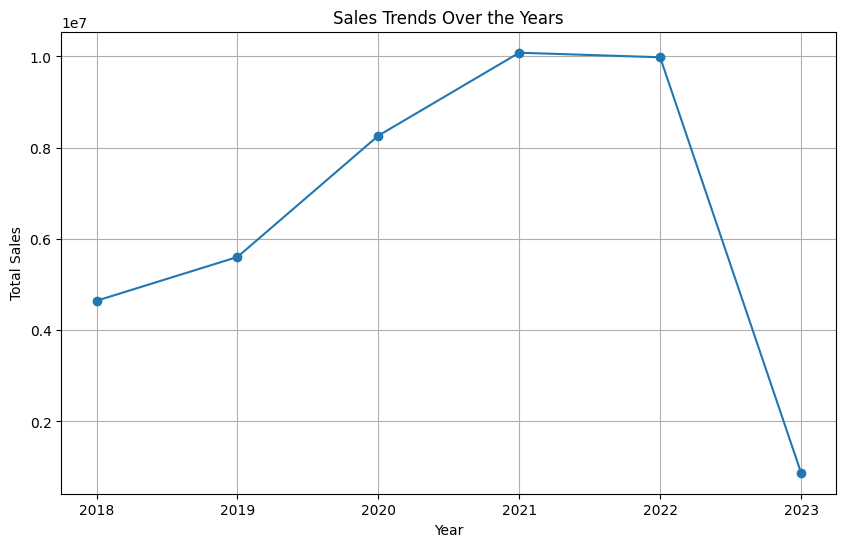

In [ ]:
sales_by_year = purchases.groupby('Year')['Total Spending'].sum().reset_index()

# Create a line plot to show sales trends over the years.
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Total Spending'], marker='o')
plt.title("Sales Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()